In [12]:
# Loading necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Data from Drive and Unzip
import zipfile

zip_path = '/content/drive/My Drive/Colab Notebooks/FOREST_FIRE_DATASET.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/Colab Notebooks/FOREST_FIRE_DATASET')

train_dir = '/content/drive/My Drive/Colab Notebooks/FOREST_FIRE_DATASET/train'
test_dir = '/content/drive/My Drive/Colab Notebooks/FOREST_FIRE_DATASET/test'


### Image Data Generators

In [4]:
# Set image size and batch size
img_size = (150, 150)
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Testing data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training images from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load testing images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 15609 images belonging to 2 classes.
Found 6122 images belonging to 2 classes.


### Define CNN Model

In [5]:
# Define input layer
inputs = Input(shape=(150, 150, 3))

# Convolutional layers
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(128, (3,3), activation='relu', name='last_conv')(x)
x = MaxPooling2D(2,2)(x)

# Dense layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid', name='dense_7')(x)

# Build model
model = Model(inputs=inputs, outputs=outputs)

# Compile
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy'])


### Train the Model

In [6]:
early_stop = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 1302s 3s/step - accuracy: 0.8019 - loss: 0.4195 - val_accuracy: 0.8945 - val_loss: 0.2589
Epoch 2/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 1111s 2s/step - accuracy: 0.8944 - loss: 0.2534 - val_accuracy: 0.9103 - val_loss: 0.2469
Epoch 3/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 1163s 2s/step - accuracy: 0.9096 - loss: 0.2332 - val_accuracy: 0.8822 - val_loss: 0.2812
Epoch 4/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 1103s 2s/step - accuracy: 0.9152 - loss: 0.2122 - val_accuracy: 0.9221 - val_loss: 0.1977
Epoch 5/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 1090s 2s/step - accuracy: 0.9269 - loss: 0.1869 - val_accuracy: 0.9316 - val_loss: 0.1731
Epoch 6/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 1113s 2s/step - accuracy: 0.9349 - loss: 0.1725 - val_accuracy: 0.9141 - val_loss: 0.2042
Epoch 7/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 1096s 2s/step - accuracy: 0.9388 - loss: 0.1661 - val_accuracy: 0.9340 - val_loss: 0.1622
Epoch 8/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 1098s 2s/step - accuracy: 0.9448 - loss: 0.1515 - 

### Evaluate on Test Data

In [7]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")

192/192 ━━━━━━━━━━━━━━━━━━━━ 128s 664ms/step - accuracy: 0.9511 - loss: 0.1332
Test Accuracy: 0.9500
Test Loss: 0.1400


### Plot Accuracy and Loss

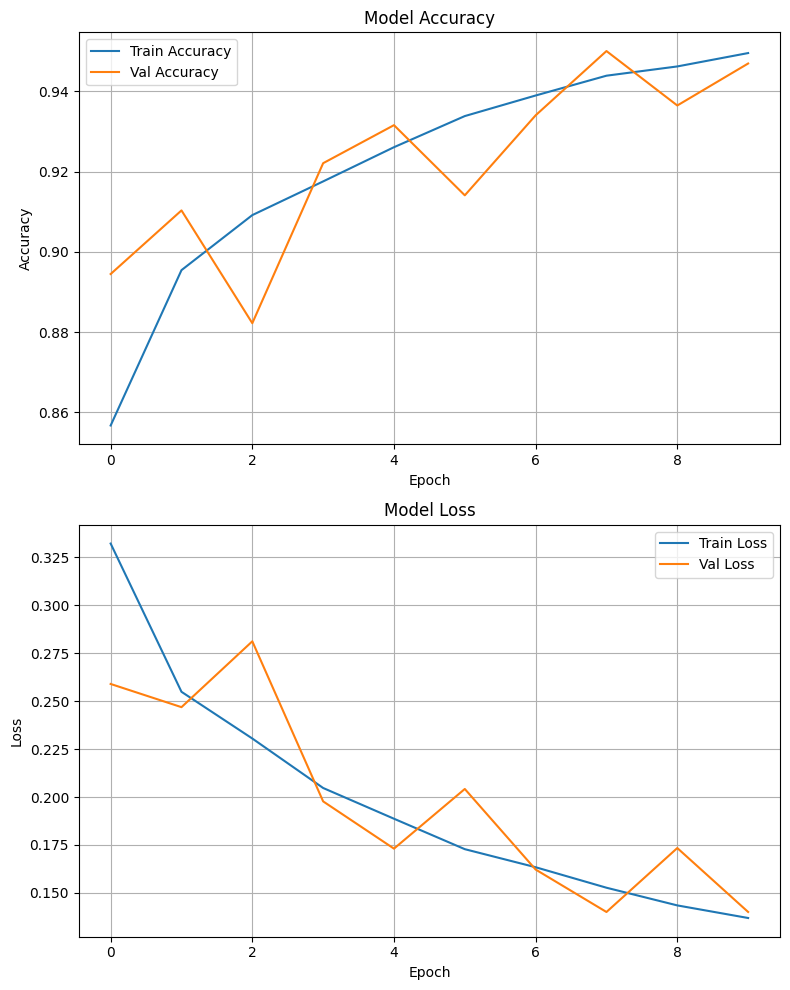

In [8]:
# Create a figure with 2 subplots vertically
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Accuracy Plot
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss Plot
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Val Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### Grad-CAM: Sample Image for fire

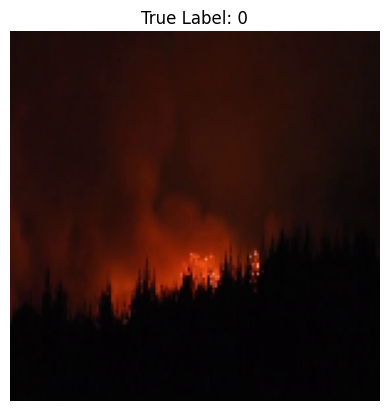

In [14]:
img_batch, label_batch = next(test_generator)
idx = 7
sample_img = img_batch[idx]
true_label = label_batch[idx]

plt.imshow(sample_img)
plt.title(f"True Label: {int(true_label)}")
plt.axis('off')
plt.show()

### Grad-CAM Visualization for fire

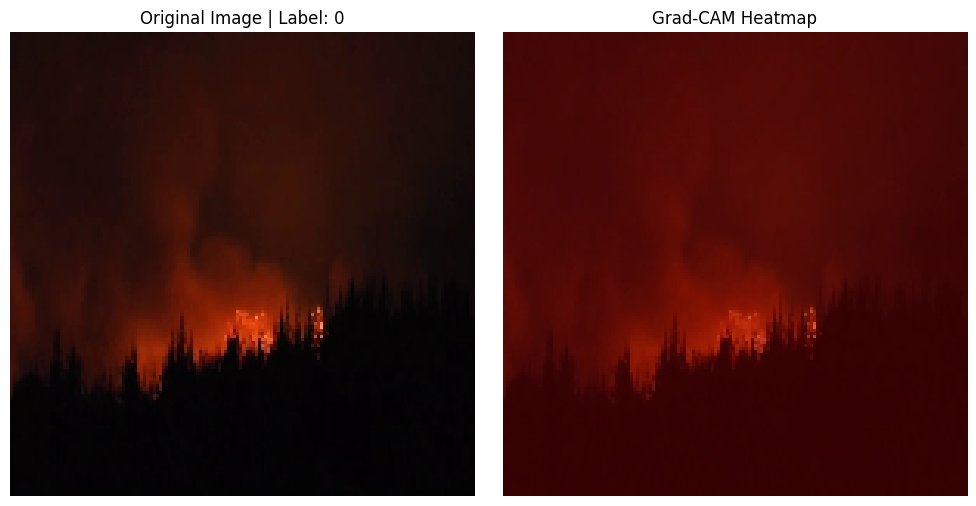

In [15]:
# Prepare the image for the model
img_input = np.expand_dims(sample_img, axis=0)

# Build Grad-CAM model
grad_model = tf.keras.models.Model(
    inputs=[model.input],
    outputs=[
        model.get_layer("last_conv").output,
        model.get_layer("dense_7").output
    ]
)

# Forward + backward pass
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_input)
    loss = predictions[0]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]
heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

# Normalize the heatmap
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap) + 1e-6
heatmap = cv2.resize(heatmap, (150, 150))
heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# Overlay heatmap on original image
sample_img_uint8 = np.uint8(sample_img * 255)
overlay = cv2.addWeighted(sample_img_uint8, 0.6, heatmap_color, 0.4, 0)

# Display original and Grad-CAM
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_img)
plt.title(f"Original Image | Label: {int(true_label)}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title("Grad-CAM Heatmap")
plt.axis("off")

plt.tight_layout()
plt.show()


### Grad-CAM Sample Image for non-fire

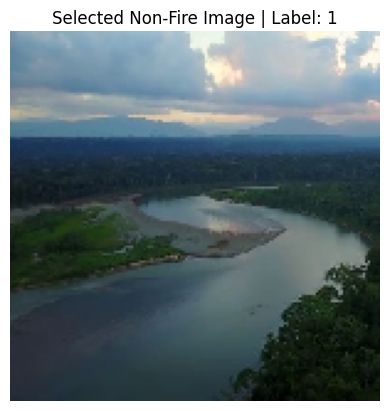

In [16]:
# Find a non-fire image (label = 1)
found = False

while not found:
    img_batch, label_batch = next(test_generator)
    for i in range(len(label_batch)):
        if label_batch[i] == 1:  # 1 = non-fire
            sample_img = img_batch[i]
            true_label = label_batch[i]
            found = True
            break

# Visualize the selected image
plt.imshow(sample_img)
plt.axis('off')
plt.title(f"Selected Non-Fire Image | Label: {int(true_label)}")
plt.show()


### Grad-CAM Visualization for non-fire

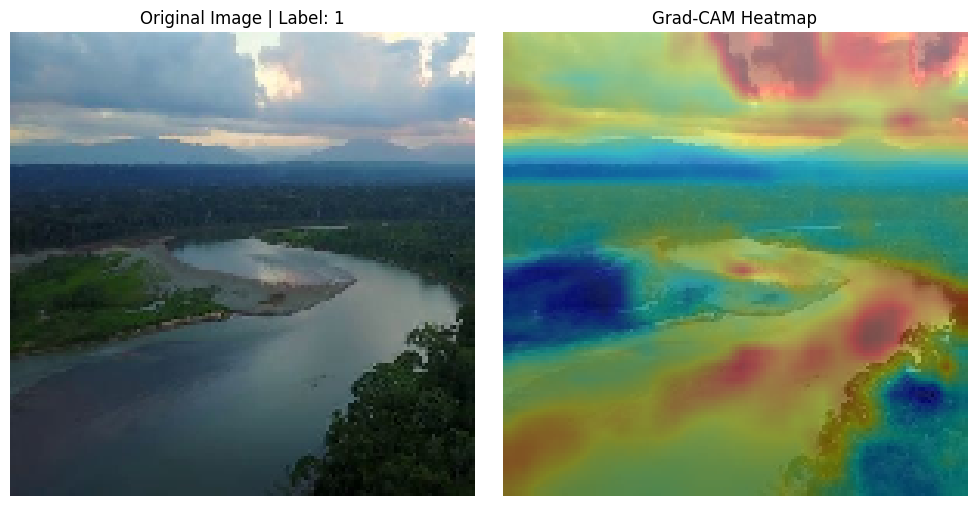

In [17]:
img_input = np.expand_dims(sample_img, axis=0)

grad_model = tf.keras.models.Model(
    inputs=[model.input],
    outputs=[
        model.get_layer("last_conv").output,
        model.get_layer("dense_7").output
    ]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_input)
    loss = predictions[0]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]
heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap) + 1e-6
heatmap = cv2.resize(heatmap, (150, 150))
heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

sample_img_uint8 = np.uint8(sample_img * 255)
overlay = cv2.addWeighted(sample_img_uint8, 0.6, heatmap_color, 0.4, 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_img)
plt.title(f"Original Image | Label: {int(true_label)}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title("Grad-CAM Heatmap")
plt.axis("off")

plt.tight_layout()
plt.show()


### Save the Model

In [18]:
model.save("wildfire_model.keras");